# EEG Emotion Classifictaion using LSTM
In this notebook i used  a LSTM model  to accurately predict the emotional states of a subject while watching various movie scenes given their EEG readings that shows person has NEGATIVE , NEUTRAL , POSITIVE feelings

<img src="https://images.squarespace-cdn.com/content/v1/56530999e4b0991ab31b67b1/1464360512453-6MGRDGDUW3Y3JWI50EQY/EEG+signals?format=1000w" width="800" height="400">

https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface

https://www.researchgate.net/publication/335173767_A_Deep_Evolutionary_Approach_to_Bioinspired_Classifier_Optimisation_for_Brain-Machine_Interaction

## Overview

### 1) Understand the data (Shape , missing values , data types )

### 2) Data Visualization 

### 3) Data Preprocessing 

### 4) Implement PCA clustering analysis

##  5) Implement LSTM

##  6) Testing model

# Libraries used in the notebook

- [seaborn](https://seaborn.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [tensorflow](https://www.tensorflow.org/)

In [1]:
from sklearn.metrics import confusion_matrix , classification_report 
from tensorflow.keras.layers import GRU , Flatten , Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Input , Model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

## load & read the dataset

In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


## Understand the data

In [4]:
print(data.shape)

(2132, 2549)


In [5]:
print(data.isnull().sum())    

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


## Data Visualization 

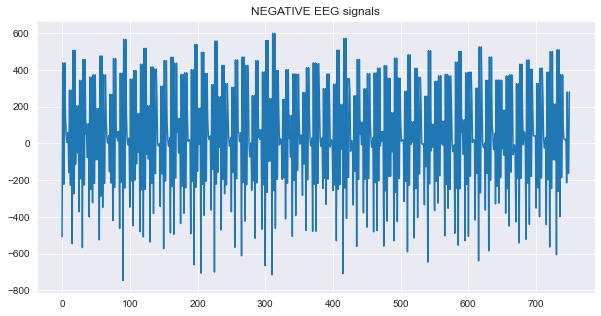

In [7]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample)), sample)
plt.title('NEGATIVE EEG signals')
plt.show()

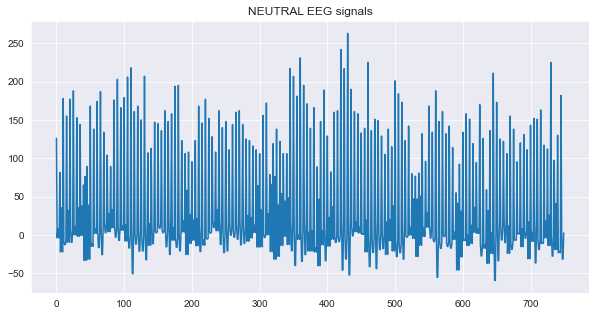

In [8]:
sample = data.loc[1, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample)), sample)
plt.title('NEUTRAL EEG signals')
plt.show()

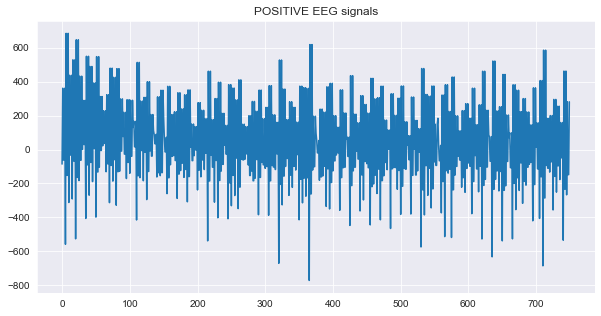

In [9]:
sample = data.loc[2, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample)), sample)
plt.title('POSITIVE EEG signals')
plt.show()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64


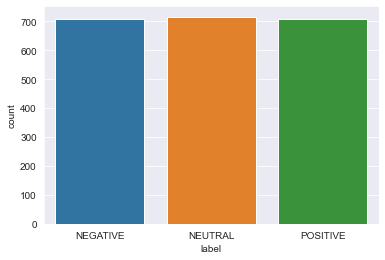

In [10]:
print(data.label.value_counts())
data['label'].value_counts()
sns.countplot(x=data['label'])
plt.show()

## Data Preprocessing 

In [11]:
# replace Labels with numbers 

label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data = data.copy()
    
data['label'] = data['label'].replace(label_mapping)
    
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [12]:
## scale data for PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)

In [13]:
# split dependent and independent variables
y = data.label
X = data.drop('label',axis=1)

## Implement PCA clustering analysis

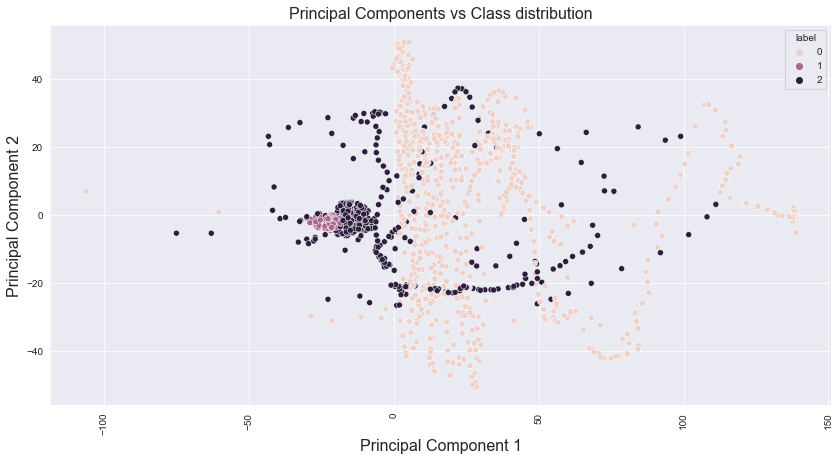

In [14]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=y)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');
plt.show()

In [15]:
# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   

## Implement Lstm

In [16]:
inputs  =  Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru     = GRU(256, return_sequences=True)(expand_dims)
flatten = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flatten)
model   = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 2548, 1)           0         
_________________________________________________________________
gru (GRU)                    (None, 2548, 256)         198912    
_________________________________________________________________
flatten (Flatten)            (None, 652288)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1956867   
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=10,)

Epoch 1/10
24/24 [==============================] - 7s 170ms/step - loss: 60.9688 - accuracy: 0.7040 - val_loss: 42.2682 - val_accuracy: 0.8538
Epoch 2/10
24/24 [==============================] - 4s 164ms/step - loss: 17.8017 - accuracy: 0.8664 - val_loss: 3.7231 - val_accuracy: 0.9240
Epoch 3/10
24/24 [==============================] - 4s 176ms/step - loss: 2.4457 - accuracy: 0.9387 - val_loss: 2.8830 - val_accuracy: 0.9298
Epoch 4/10
24/24 [==============================] - 4s 163ms/step - loss: 1.0343 - accuracy: 0.9681 - val_loss: 2.1439 - val_accuracy: 0.9240
Epoch 5/10
24/24 [==============================] - 4s 163ms/step - loss: 0.4788 - accuracy: 0.9811 - val_loss: 2.2993 - val_accuracy: 0.9240
Epoch 6/10
24/24 [==============================] - 4s 158ms/step - loss: 0.1196 - accuracy: 0.9909 - val_loss: 1.3745 - val_accuracy: 0.9766
Epoch 7/10
24/24 [==============================] - 4s 157ms/step - loss: 0.5991 - accuracy: 0.9765 - val_loss: 1.2650 - val_accuracy: 0.9708
Epo

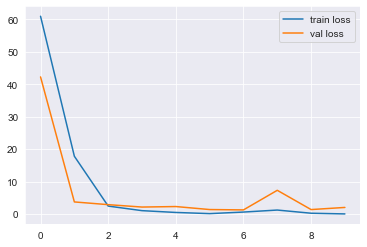

<Figure size 432x288 with 0 Axes>

In [21]:
# plot loss and val_loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

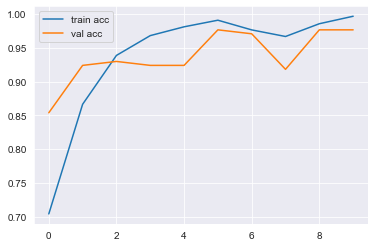

In [22]:
# plot accuracy and val_accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

## Testing Model

In [23]:
model_acc = model.evaluate(X_test, y_test)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

14/14 [==============================] - 1s 52ms/step - loss: 1.5587 - accuracy: 0.9625
Test Accuracy: 96.253%


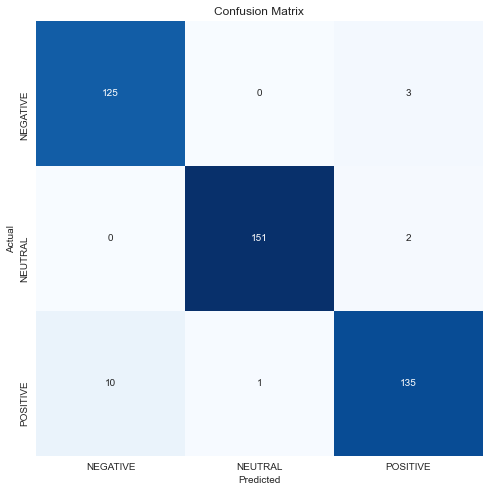

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.93      0.98      0.95       128
     NEUTRAL       0.99      0.99      0.99       153
    POSITIVE       0.96      0.92      0.94       146

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [24]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Precision , Recall , F1-score
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)